# Earth Fever :  The Unignorable Impact of Climate Change




## In this section :

<p align="justify">
In this section of Earth Fever, we  are diverting our attention towards Antarctica. This study aims to analyze the interplay between Radiation, Ice Mass, and Penguin Population data in the context of Air Temperature. It seeks to uncover the connections between emissions data and Air Temperatures, elucidating their relationship and predictive potential for future temperatures. Additionally, the research explores the correlation between Ice Mass and Gentoo Penguin Populations, shedding light on the intricate ecological linkages within these interconnected variables.
</p>

**Data Souces**

*Climate data - Mesonet API ( temperatures data ):*

https://atmos.uw.edu/blog/jzagrod/2018/08/10/how-to-use-pandas-to-download-and-plot-weather-data-from-the-mesonet-api/

*Emissions Data(N20, Infrared, solar, UV):*

https://www.esrl.noaa.gov/gmd/dv/data/


*The Antarctic Iceberg Tracking Dataset:*

https://climate.nasa.gov/vital-signs/ice-sheets/

*Gentoo Penguin population Dataset:*

http://www.penguinmap.com/mapppd

### Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
from pandas.tseries.offsets import DateOffset
warnings.filterwarnings("ignore")

### Dataset

We now combine the Emissions, Antarctic Iceberg Data and Climate Data together in one csv. We had conistent data only till 2019. So we have picked 10 yrs of data which is from year 2010 to 2019.


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ProjectDatasets/climate_data.csv")

In [ ]:
data.head(10)

,Date,Solar Radiation,UV radiation,Highest Infrared radiation,Air temperature,N2O level,Antarctic mass(Gigatonnes),Antarctic mass 1-sigma uncertainty,DETER,DETER TTM,SAD,SAD TTM
0,2010-01,171.46,10.24,346.41,7.43,323.70,-803.23,33.03,23,2905,63,1915
1,2010-02,216.36,16.83,360.59,8.83,323.85,-807.45,32.76,185,2947,88,1941
2,2010-03,268.88,29.48,382.27,11.67,323.94,-688.18,34.51,52,2981,76,1960
3,2010-04,320.56,43.18,408.13,14.50,324.08,-759.94,32.20,52,2996,65,1904
4,2010-05,404.24,56.52,439.41,18.38,323.85,-780.91,32.63,110,2982,96,1843
5,2010-06,436.70,69.21,495.04,27.64,323.73,-794.11,38.44,244,2647,172,1865
6,2010-07,399.97,68.43,524.21,32.51,323.66,-998.22,35.63,485,2296,155,1488
7,2010-08,438.29,60.29,524.21,32.51,323.47,-927.15,34.62,265,2063,210,1425
8,2010-09,408.54,46.55,473.62,26.35,323.49,-848.74,36.40,448,2111,170,1379
9,2010-10,233.63,25.60,417.23,18.38,323.66,-880.52,38.44,389,2324,153,1338


## Section 1 : Radiation and Air Temperature

**Trend in Air Temperature over Time:**

Create a line plot showing the trend of air temperature over the years. This can help visualize the overall warming trend.

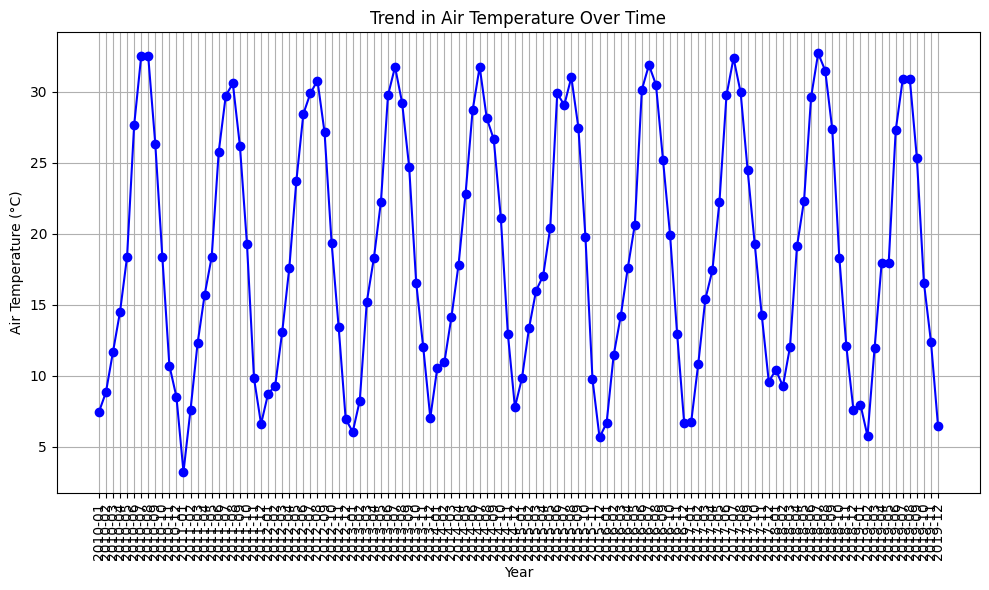

In [ ]:
dates = data['Date']
air_temperature = data['Air temperature']

# Convert dates to integers for x-axis
x_values = list(range(len(dates)))

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, air_temperature, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Trend in Air Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Air Temperature (°C)')
plt.xticks(x_values, dates, rotation='vertical')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Solar Radiation and Air Temperature Correlation:**

Generate a scatter plot with Solar Radiation on the x-axis and Air Temperature on the y-axis. Look for any patterns or correlations between increased solar radiation and higher temperatures.

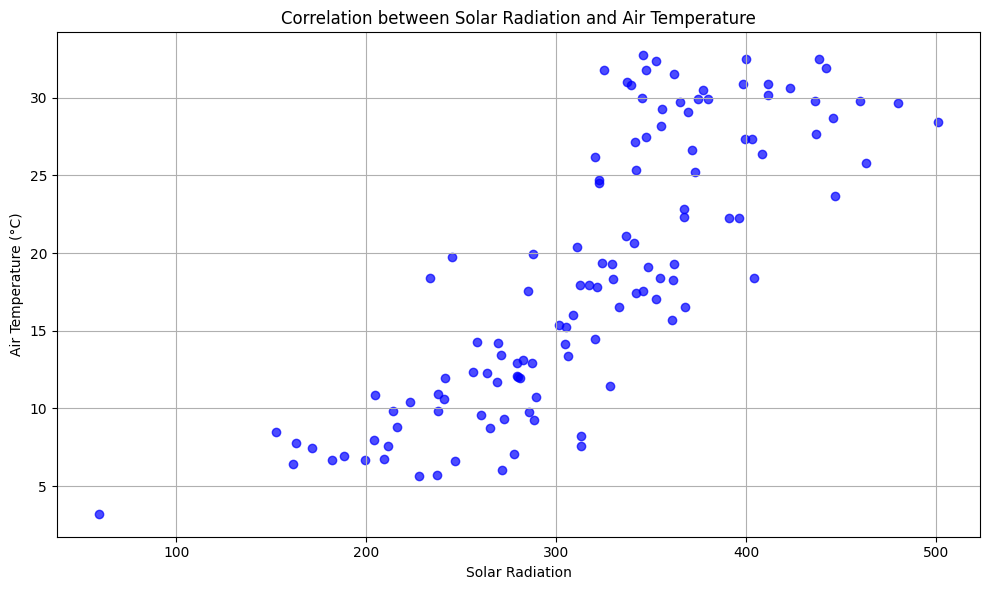

In [ ]:
solar_radiation = data["Solar Radiation"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(solar_radiation, air_temperature, color='b', alpha=0.7)

# Customize the plot
plt.title('Correlation between Solar Radiation and Air Temperature')
plt.xlabel('Solar Radiation')
plt.ylabel('Air Temperature (°C)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**UV Radiation and Air Temperature Correlation:**

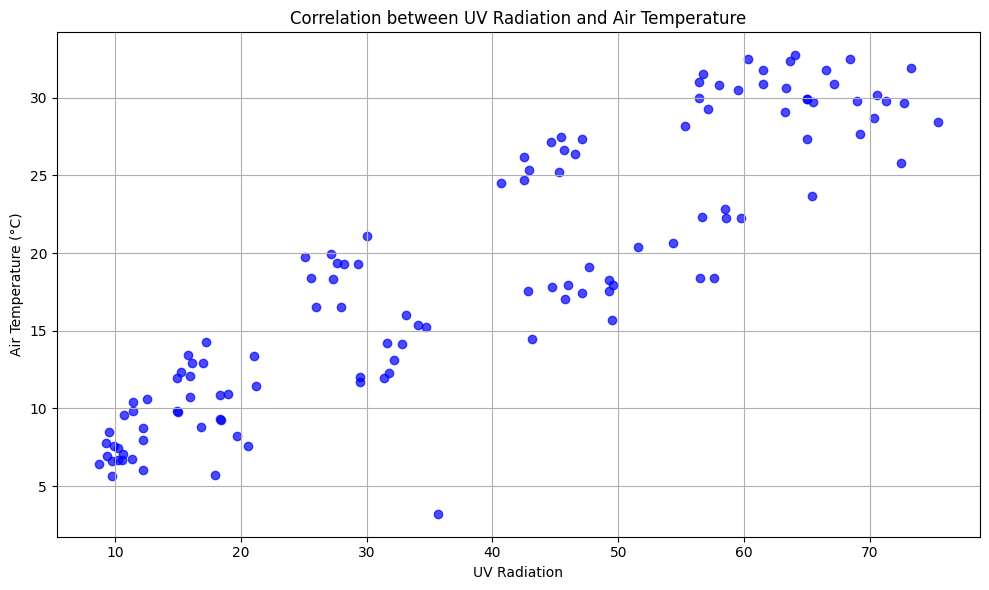

In [ ]:
uv_radiation = data["UV radiation"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(uv_radiation, air_temperature, color='b', alpha=0.7)

# Customize the plot
plt.title('Correlation between UV Radiation and Air Temperature')
plt.xlabel('UV Radiation')
plt.ylabel('Air Temperature (°C)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

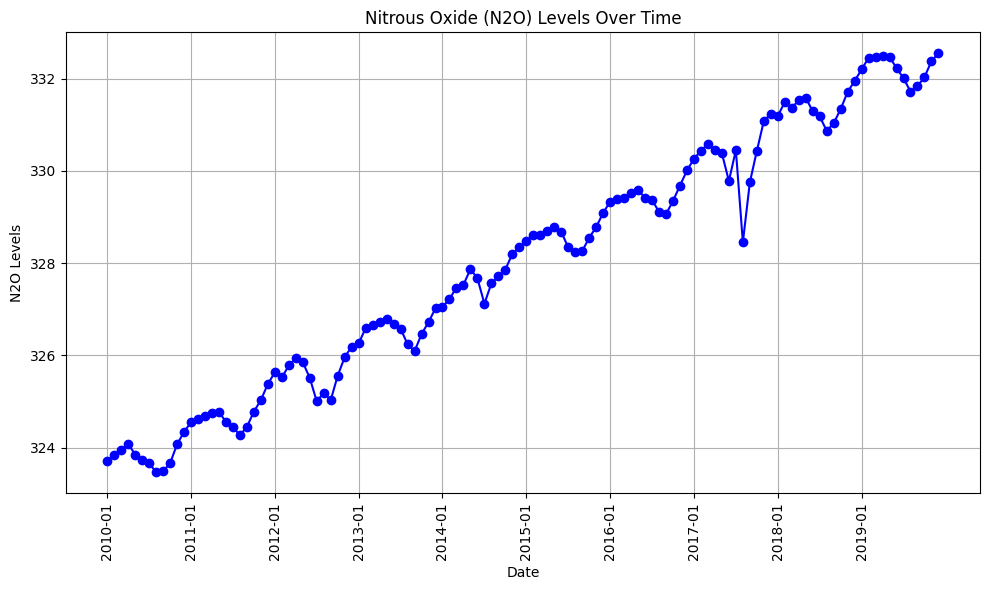

In [ ]:
n2o_levels = data['N2O level']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, n2o_levels, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Nitrous Oxide (N2O) Levels Over Time')
plt.xlabel('Date')
plt.ylabel('N2O Levels')
plt.xticks(dates[::12], rotation='vertical')  # Show every 12 months for readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

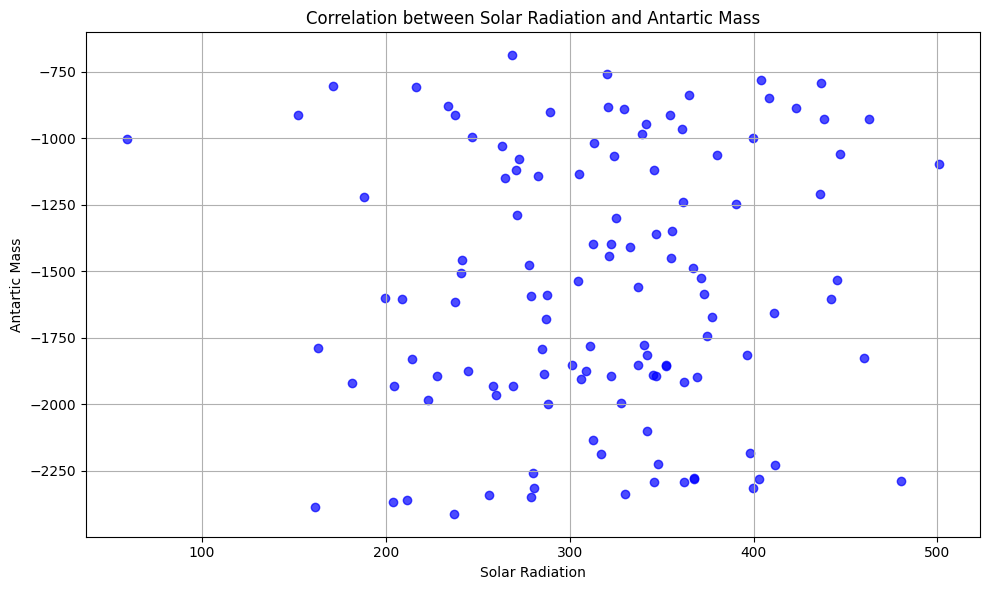

In [ ]:
antarctic_mass = data['Antarctic mass(Gigatonnes)']
plt.figure(figsize=(10, 6))
plt.scatter(solar_radiation, antarctic_mass, color='b', alpha=0.7)

# Customize the plot
plt.title('Correlation between Solar Radiation and Antartic Mass')
plt.xlabel('Solar Radiation')
plt.ylabel('Antartic Mass')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

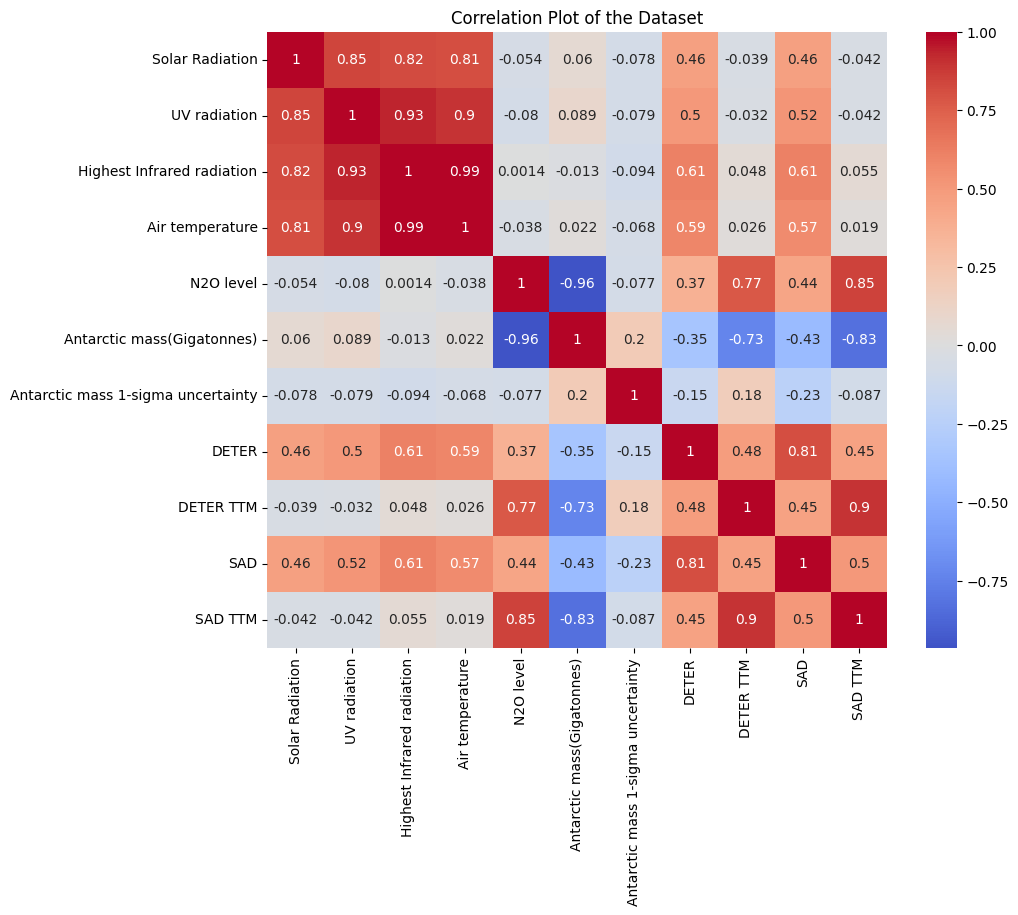

In [ ]:
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Plot of the Dataset')
plt.show()

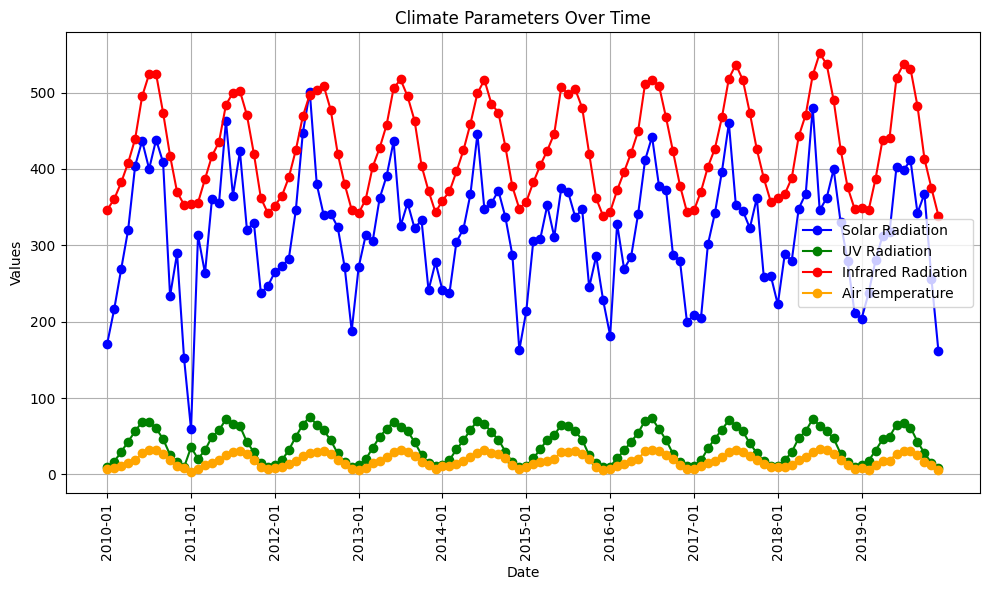

In [ ]:
infrared_radiation = data['Highest Infrared radiation']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(dates, solar_radiation, marker='o', linestyle='-', color='b', label='Solar Radiation')
plt.plot(dates, uv_radiation, marker='o', linestyle='-', color='g', label='UV Radiation')
plt.plot(dates, infrared_radiation, marker='o', linestyle='-', color='r', label='Infrared Radiation')
plt.plot(dates, air_temperature, marker='o', linestyle='-', color='orange', label='Air Temperature')

# Customize the plot
plt.title('Climate Parameters Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(dates[::12], rotation='vertical')  # Show every 12 months for readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
climate_data = data

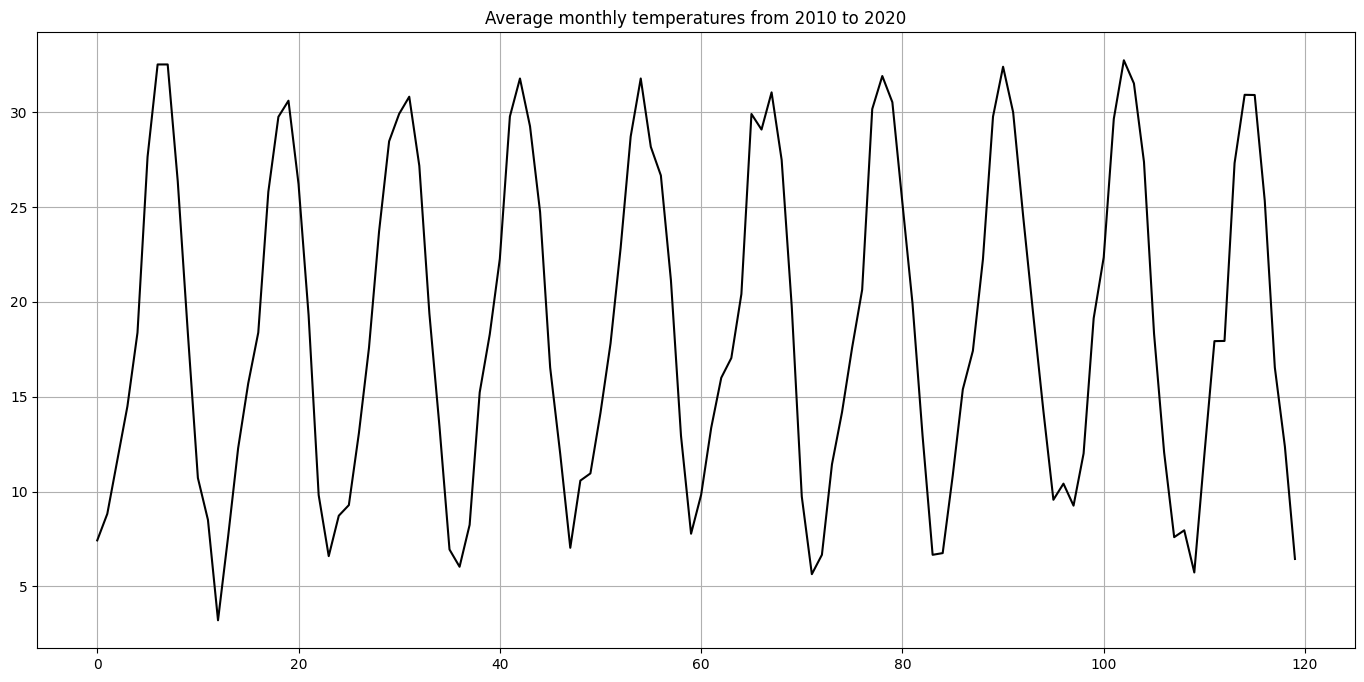

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(climate_data.index,climate_data['Air temperature'],color='black')
plt.title('Average monthly temperatures from 2010 to 2020')
plt.grid(True)

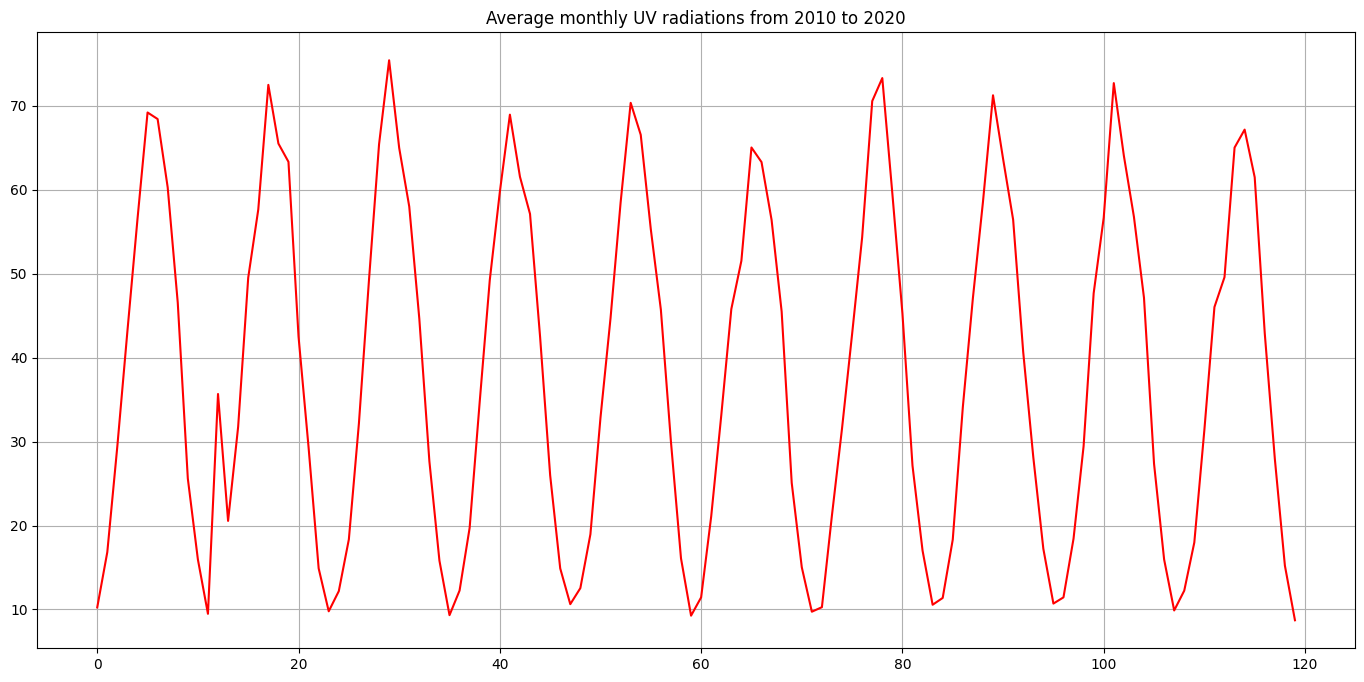

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(climate_data.index,climate_data['UV radiation'],color='red')
plt.title('Average monthly UV radiations from 2010 to 2020')
plt.grid(True)

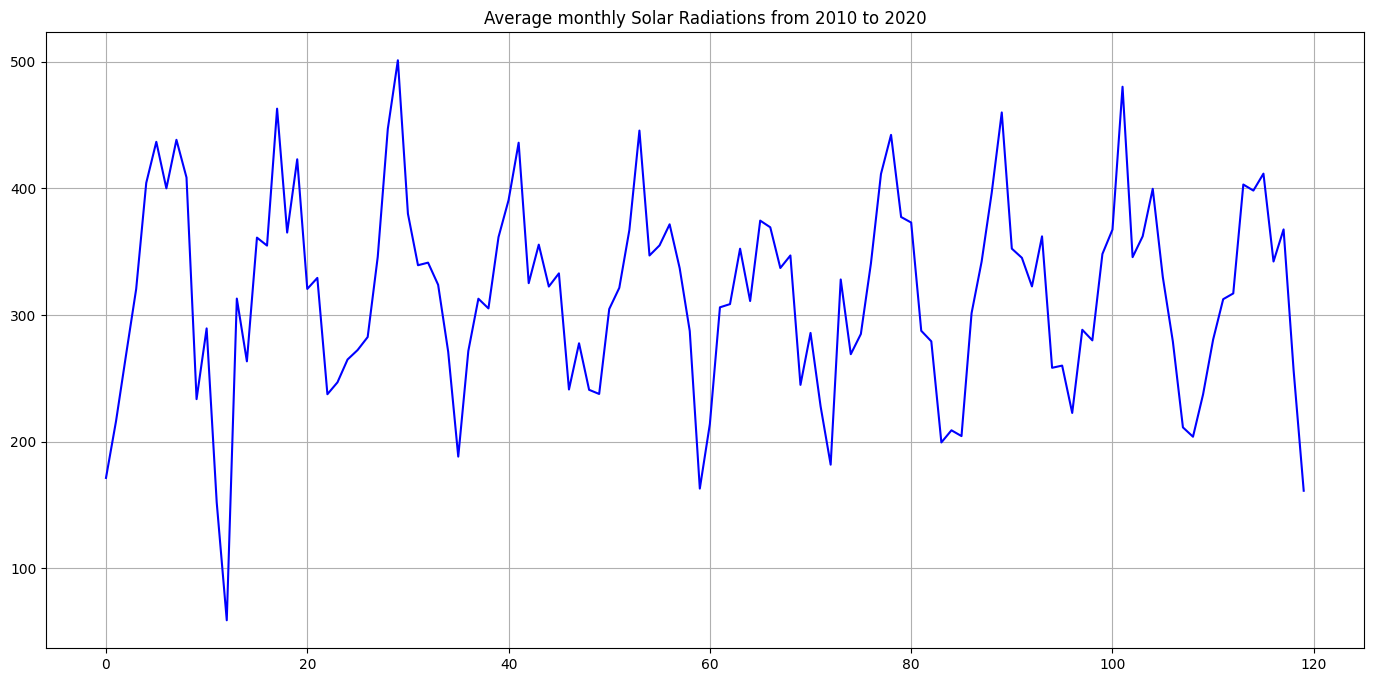

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(climate_data.index,climate_data['Solar Radiation'],color='blue')
plt.title('Average monthly Solar Radiations from 2010 to 2020')
plt.grid(True)

In [ ]:
climate_data = climate_data.set_index('Date')

In [ ]:
radiations = climate_data[['Solar Radiation','UV radiation','Highest Infrared radiation','N2O level']].copy()
radiations=radiations.dropna()

In [ ]:
radiations.index=pd.to_datetime(radiations.index)
train,test=radiations[:-12],radiations[-12:]
scaler= MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)
n_input=12
n_features=4
generator=TimeseriesGenerator(train,train, length=n_input, batch_size=10)
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.2))
model.add(Dense(4))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator, epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 8ms/step - loss: 0.2227
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1210
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0833
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0756
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0730
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0671
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0605
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0664
Epoch 9/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0597
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0528
Epoch 11/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0485
Epoch 12/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0391
Epoch 13/100
10/10 [=================

In [ ]:
prediction=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    prediction.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[prediction[i]]],axis=1)
prediction=pd.DataFrame(scaler.inverse_transform(prediction),index=radiations[-n_input:].index)

1/1 [==============================] - 0s 25ms/step


In [ ]:
radiations_attached=pd.concat([radiations,prediction],axis=1)

Text(0.5, 1.0, 'N20 Levels')

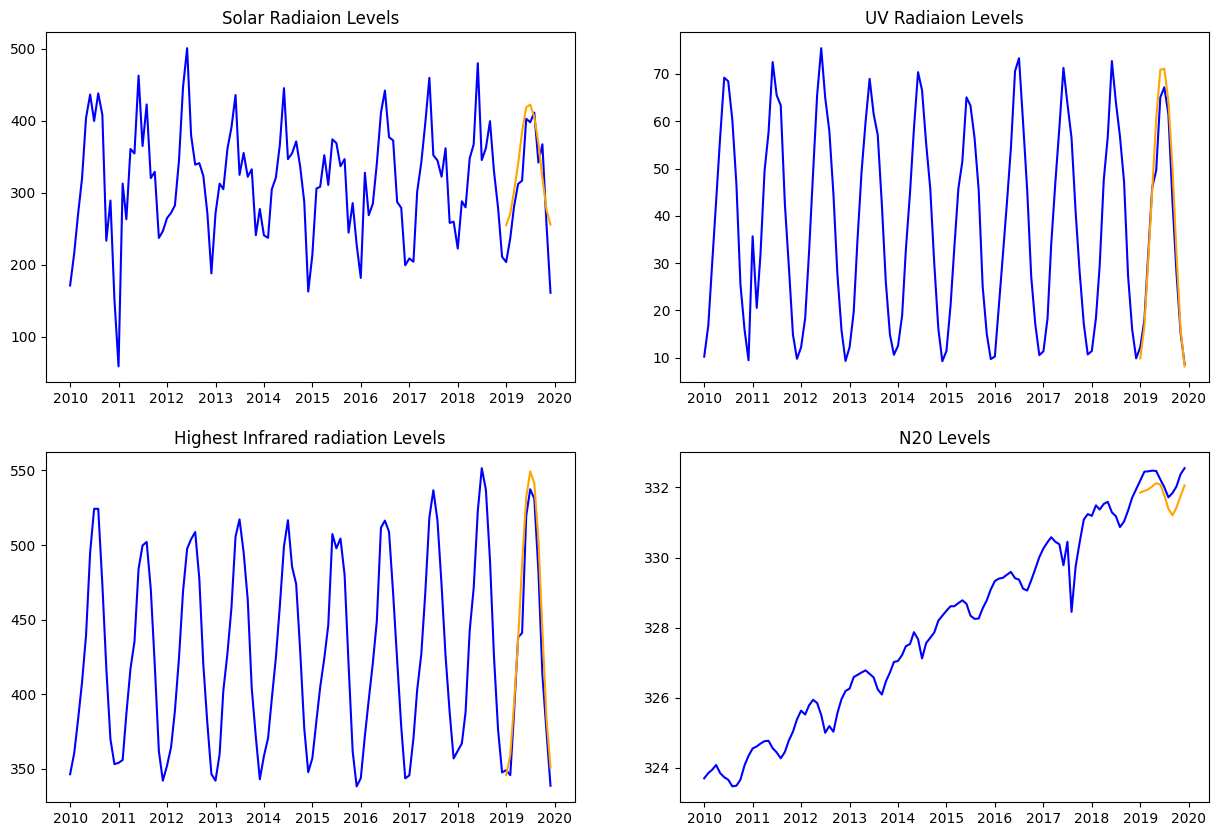

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(15,10))

axs[0,0].plot(radiations_attached['Solar Radiation'],color='blue')
axs[0,0].plot(radiations_attached[0],color='orange')
axs[0,0].set_title('Solar Radiaion Levels')

axs[0,1].plot(radiations_attached['UV radiation'],color='blue')
axs[0,1].plot(radiations_attached[1],color='orange')
axs[0,1].set_title('UV Radiaion Levels')

axs[1,0].plot(radiations_attached['Highest Infrared radiation'],color='blue')
axs[1,0].plot(radiations_attached[2],color='orange')
axs[1,0].set_title('Highest Infrared radiation Levels')

axs[1,1].plot(radiations_attached['N2O level'],color='blue')
axs[1,1].plot(radiations_attached[3],color='orange')
axs[1,1].set_title('N20 Levels')

In [ ]:
train=radiations

scaler= MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)

n_input=12
n_features=4
generator=TimeseriesGenerator(train,train, length=n_input, batch_size=10)
model.fit_generator(generator, epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0108
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0115
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0108
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 11/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 12/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 13/100
11/11 [=================

In [ ]:
add_dates=[radiations.index[-1] + DateOffset(months=x) for x in range(0,13)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=radiations.columns)

In [ ]:
prediction=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    prediction.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[prediction[i]]],axis=1)

prediction=pd.DataFrame(scaler.inverse_transform(prediction),index=future_dates[-n_input:].index)

1/1 [==============================] - 0s 29ms/step


In [ ]:
radiations_predicted = pd.concat([radiations,prediction],axis=1)

Text(0.5, 1.0, 'N20 Levels')

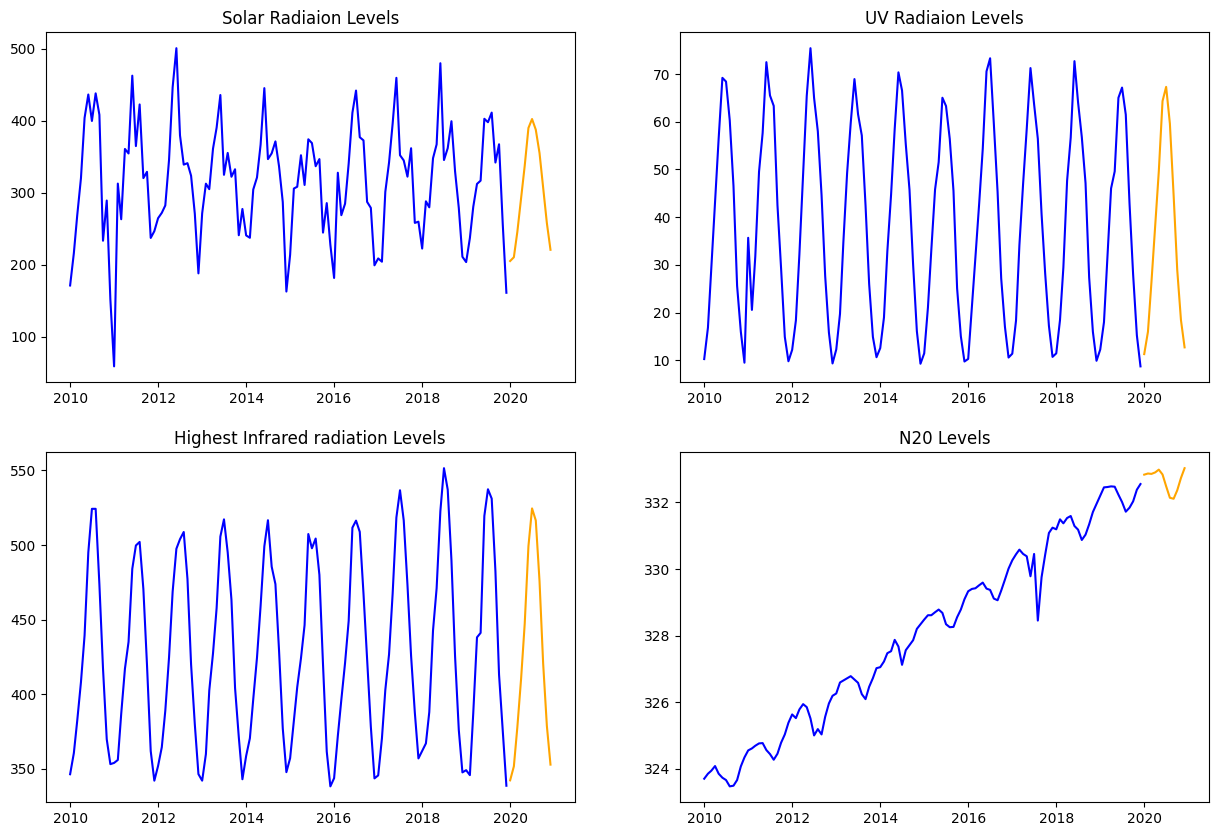

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(15,10))

axs[0,0].plot(radiations_predicted['Solar Radiation'],color='blue')
axs[0,0].plot(radiations_predicted[0],color='orange')
axs[0,0].set_title('Solar Radiaion Levels')

axs[0,1].plot(radiations_predicted['UV radiation'],color='blue')
axs[0,1].plot(radiations_predicted[1],color='orange')
axs[0,1].set_title('UV Radiaion Levels')

axs[1,0].plot(radiations_predicted['Highest Infrared radiation'],color='blue')
axs[1,0].plot(radiations_predicted[2],color='orange')
axs[1,0].set_title('Highest Infrared radiation Levels')

axs[1,1].plot(radiations_predicted['N2O level'],color='blue')
axs[1,1].plot(radiations_predicted[3],color='orange')
axs[1,1].set_title('N20 Levels')

In [ ]:
radiations_future=pd.concat([radiations,prediction.rename(columns={0:'Solar Radiation',1:'UV radiation',2:'Highest Infrared radiation',3:'N2O level'})])

In [ ]:
air_temp=pd.DataFrame(climate_data['Air temperature'])
air_temp.index=pd.to_datetime(air_temp.index)
future_radiations1=pd.concat([radiations_future,air_temp],axis=1)

In [ ]:
air_temp=pd.DataFrame(future_radiations1['Air temperature'])
from keras.optimizers import Adam
X_train,X_test, Y_train, Y_test=radiations_future[:-24],radiations_future[-24:-12],air_temp[:-24],air_temp[-24:-12]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)


model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=6, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 0.2174
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 12/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 13/100
18/18 [=================

1/1 [==============================] - 0s 63ms/step


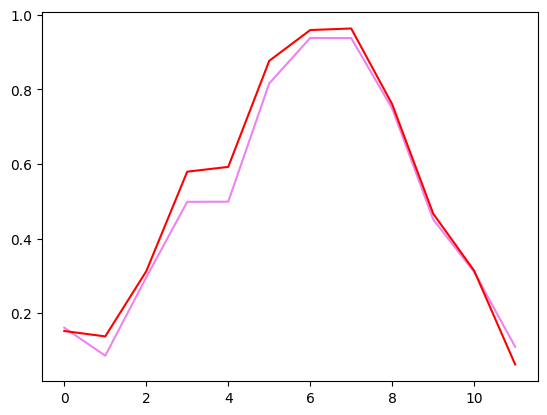

In [ ]:
y_pred = model.predict(X_test)
plt.plot(Y_test,color='violet')
plt.plot(y_pred,color='red')

In [ ]:
X_train,X_test, Y_train, Y_test=radiations_future[:-12],radiations_future[-12:],air_temp[:-12],air_temp[-12:]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)
model.fit(X_train, Y_train, batch_size=16, epochs=100, verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 3.8009e-04
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 3.5336e-04
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 3.3496e-04
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 3.1316e-04
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.7195e-04
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 2.5709e-04
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4238e-04
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 2.5583e-04
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 2.4624e-04
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 2.4379e-04
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 2.2685e-04
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 2.2954e-04
Epoch 13/100


In [ ]:
y_pred = model.predict(X_test)
Y_prediction=pd.DataFrame(scaler.inverse_transform(y_pred),index=future_radiations1[-12:].index)
y_train=pd.DataFrame(scaler.inverse_transform(Y_train),index=future_radiations1[:-12].index)

1/1 [==============================] - 0s 21ms/step


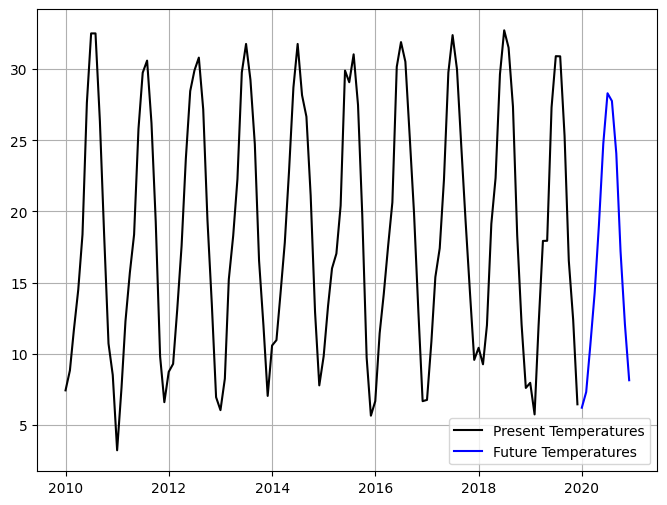

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_train,label = 'Present Temperatures',color='black')
plt.plot(Y_prediction,label='Future Temperatures',color='blue')
plt.legend(loc='best')
plt.grid(True)

In [ ]:
X_train,X_test, Y_train, Y_test=radiations_future[['N2O level']][:-12],radiations_future[['N2O level']][-12:],air_temp[:-12],air_temp[-12:]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)

In [ ]:
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=6, epochs=100, verbose=1)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.4822
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1406
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1361
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1220
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1128
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1075
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1008
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0951
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0925
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0912
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0908
Epoch 13/100
20/20 [=================

1/1 [==============================] - 0s 94ms/step


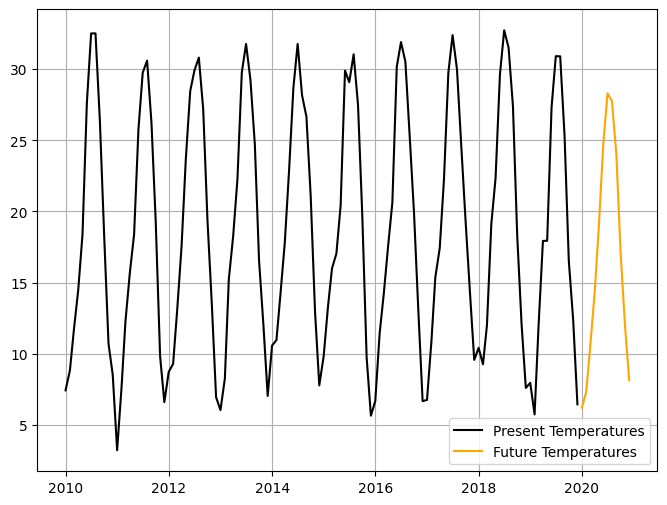

In [ ]:
_pred = model.predict(X_test)
Y_prediction=pd.DataFrame(scaler.inverse_transform(y_pred),index=future_radiations1[-12:].index)
y_train=pd.DataFrame(scaler.inverse_transform(Y_train),index=future_radiations1[:-12].index)
plt.figure(figsize=(8,6))
plt.plot(y_train,label = 'Present Temperatures',color='black')
plt.plot(Y_prediction,label='Future Temperatures',color='orange')
plt.legend(loc='best')
plt.grid(True)

In [ ]:
X_train,X_test, Y_train, Y_test=radiations_future[['Highest Infrared radiation']][:-12],radiations_future[['Highest Infrared radiation']][-12:],air_temp[:-12],air_temp[-12:]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)
model.fit(X_train, Y_train, batch_size=6, epochs=100, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0591
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 13/100
20/20 [=================

1/1 [==============================] - 0s 22ms/step


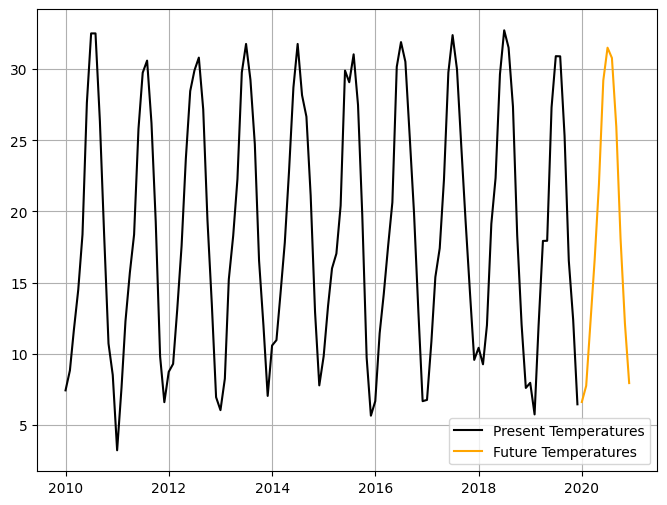

In [ ]:
y_pred = model.predict(X_test)
Y_prediction=pd.DataFrame(scaler.inverse_transform(y_pred),index=future_radiations1[-12:].index)
y_train=pd.DataFrame(scaler.inverse_transform(Y_train),index=future_radiations1[:-12].index)

plt.figure(figsize=(8,6))
plt.plot(y_train,label = 'Present Temperatures',color='black')
plt.plot(Y_prediction,label='Future Temperatures',color='orange')
plt.legend(loc='best')
plt.grid(True)

## Section 2 : Antartic Mass and Air Temperature


**Antarctic Mass Variation Over Time:**

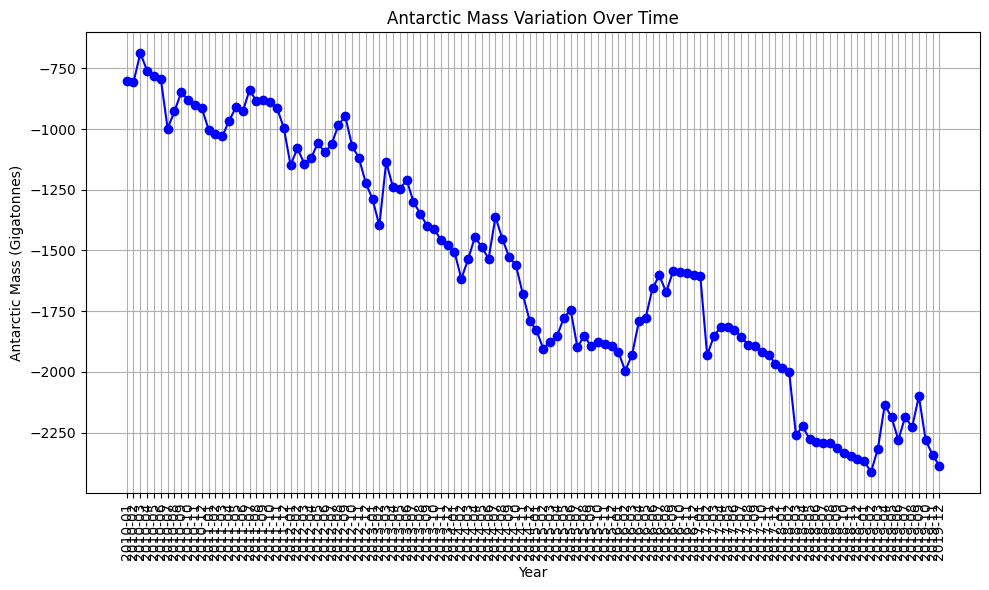

In [ ]:
antarctic_mass = data["Antarctic mass(Gigatonnes)"]

# Convert dates to integers for x-axis
x_values = list(range(len(dates)))

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, antarctic_mass, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Antarctic Mass Variation Over Time')
plt.xlabel('Year')
plt.ylabel('Antarctic Mass (Gigatonnes)')
plt.xticks(x_values, dates, rotation='vertical')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

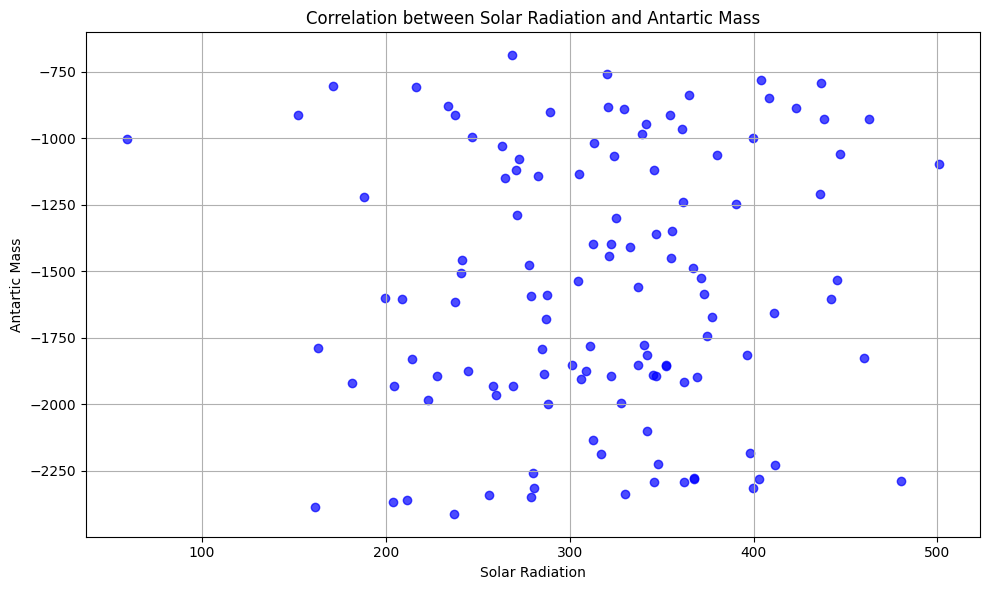

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(solar_radiation, antarctic_mass, color='b', alpha=0.7)

# Customize the plot
plt.title('Correlation between Solar Radiation and Antartic Mass')
plt.xlabel('Solar Radiation')
plt.ylabel('Antartic Mass')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

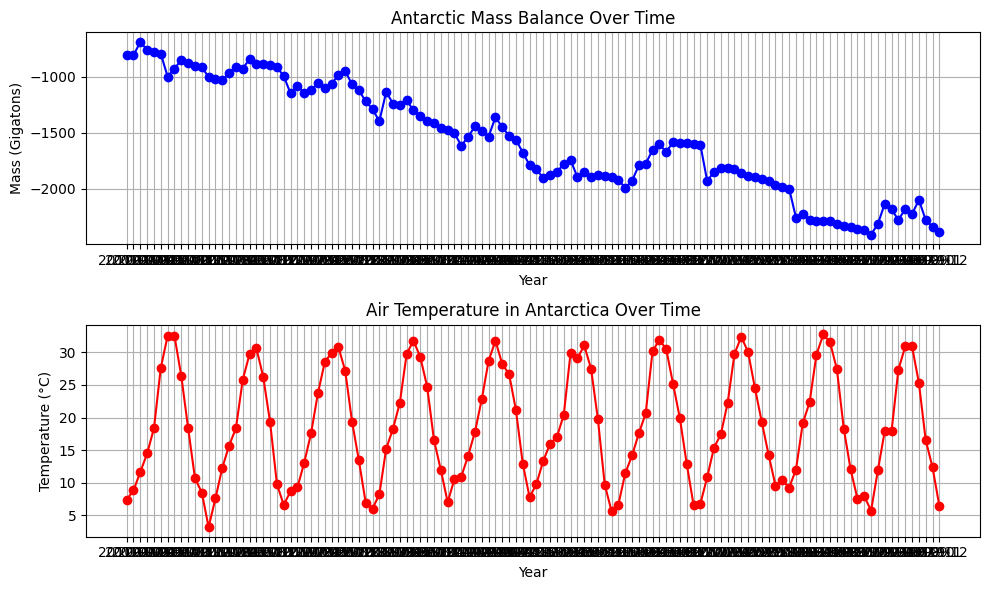

In [ ]:
# Plotting Antarctic mass and air temperature
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  # Mass subplot
plt.plot(dates, antarctic_mass, marker='o', color='b')
plt.title('Antarctic Mass Balance Over Time')
plt.xlabel('Year')
plt.ylabel('Mass (Gigatons)')
plt.grid()

plt.subplot(2, 1, 2)  # Temperature subplot
plt.plot(dates, air_temperature, marker='o', color='r')
plt.title('Air Temperature in Antarctica Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.tight_layout()
plt.show()

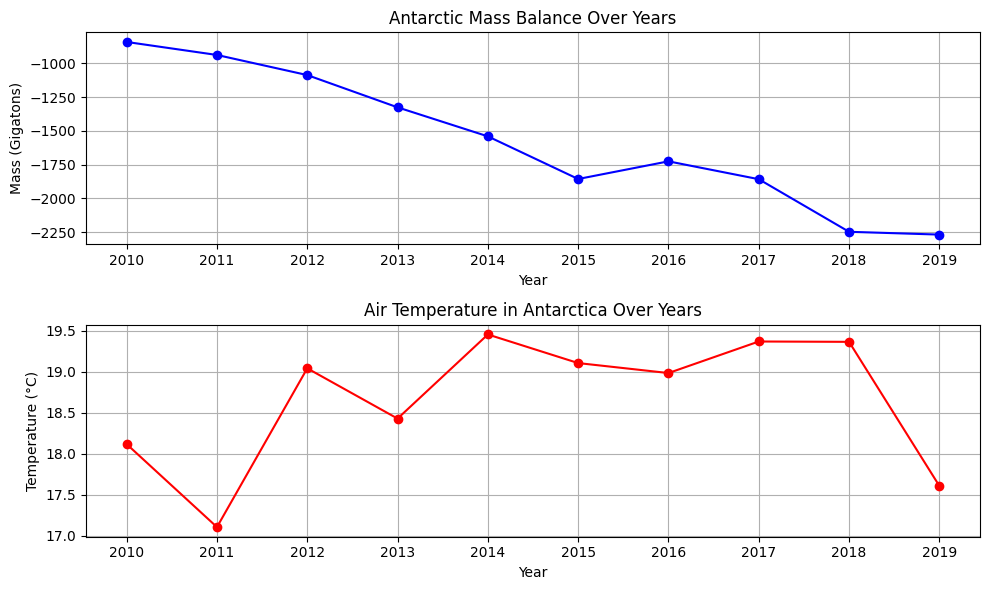

In [ ]:
a_m_np = antarctic_mass.to_numpy()
reshaped_mass = a_m_np.reshape(-1, 12)
averages = np.mean(reshaped_mass, axis=1)
a_tp_np = air_temperature.to_numpy()
reshaped_mass_at = a_tp_np.reshape(-1, 12)
averages_tp = np.mean(reshaped_mass_at, axis=1)
years = ['2010', '2011' , '2012', '2013' ,'2014', '2015' ,'2016', '2017' ,'2018', '2019']

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  # Mass subplot
plt.plot(years, averages, marker='o', color='b')
plt.title('Antarctic Mass Balance Over Years')
plt.xlabel('Year')
plt.ylabel('Mass (Gigatons)')
plt.grid()

plt.subplot(2, 1, 2)  # Temperature subplot
plt.plot(years, averages_tp, marker='o', color='r')
plt.title('Air Temperature in Antarctica Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.tight_layout()
plt.show()

## Section 3 : Gentoo Penguins